In [6]:
import torch
import torch.nn as nn
from torch.nn import functional as F

net=nn.Sequential(nn.Linear(20,256),nn.ReLU(),nn.Linear(256,10))
X=torch.rand(2,20)


class MLP(nn.Module):
    #用模型参数声明层,声明两个全连接的层
    def __init__(self):
        #调用MLP的父类Module的构造函数执行初始化
        super().__init__()
        self.hidden=nn.Linear(20,256)
        self.out=nn.Linear(256,10)

    #定义模型的前向传播、
    def forward(self,x):
        return self.out(F.relu(self.hidden(x)))
        

net=MLP()
net(X)

tensor([[ 0.2600,  0.0693, -0.2844, -0.0511,  0.3185, -0.2180,  0.0710, -0.2690,
          0.4570, -0.0656],
        [ 0.1226,  0.0710, -0.0906, -0.0224,  0.3669, -0.0437, -0.0033, -0.1796,
          0.3041, -0.0095]], grad_fn=<AddmmBackward0>)

In [17]:
#顺序块
class MySequential(nn.Module):
    def __init__(self,*args):
        super().__init__()
        for idx,module in enumerate(args):
            self._modules[str(idx)]=module
    def forward(self,X):
        for block in self._modules.values():
            X=block(X)
        return X

net=MySequential(nn.Linear(20,256),nn.ReLU(),nn.Linear(256,10))
net(X)

tensor([[ 0.1266, -0.0017, -0.2663, -0.0883,  0.2423, -0.1950,  0.0940, -0.0714,
          0.1069,  0.1639],
        [ 0.1347, -0.0215, -0.1863, -0.2038,  0.0770, -0.1822,  0.1067, -0.1605,
          0.3067,  0.0858]], grad_fn=<AddmmBackward0>)

>在调用forward函数的时候推荐使用net(x)这样进行调用,这样会调用__call__()函数,这个函数里面还有一些其他的内部逻辑,直接使用net.forward()这样调用会绕过其中的一些内部逻辑,比如:
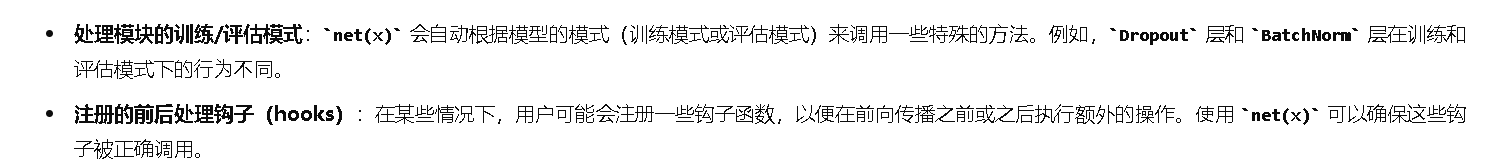

### 在前向传播中执行代码
到目前为止,我们网络中的所有操作都对网络的激活值及网络的参数起作用,有时候我们可能希望合并的既不是上一层的结果也不是可更新参数的项,我们称之为常数参数

In [19]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.rand_weight=torch.rand((20,20),requires_grad=False)
        self.linear=nn.Linear(20,20)
    
    def forward(self,X):
        X=self.linear(X)
        X=F.relu(torch.mm(X,self.rand_weight)+1)
        X=self.linear(X)
        while X.abs().sum()>1:
            X/=2
        return X.sum()
    
net=FixedHiddenMLP()

net(X)

tensor(0.3136, grad_fn=<SumBackward0>)